In [ ]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/home/l2-48/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Data Class Proportions:
Normal: 621 OSCC: 2032


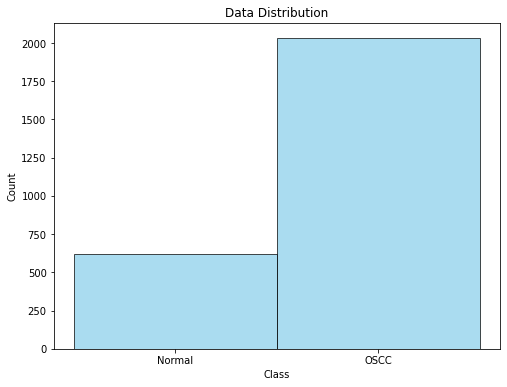

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-48/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label to the labels list
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert data to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Print class proportions
print("Data Class Proportions:")
print("Normal:", np.sum(all_labels == 0), "OSCC:", np.sum(all_labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(all_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Normal Images: (600, 224, 224)
OSCC Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


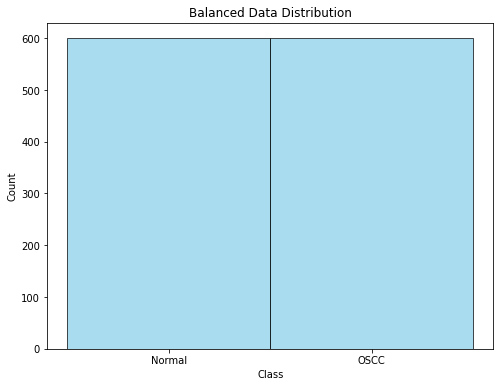

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = "/home/l2-48/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for NORMAL, 1 for OSCC) to the labels list
        labels.append(0 if class_name == 'NORMAL' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = images[labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = images[labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = labels[labels == 0][:600]
oscc_labels = labels[labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Normal Images:", normal_images.shape)
print("OSCC Images:", oscc_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Plot histogram for the balanced class distribution
plt.figure(figsize=(8, 6))
plt.hist(balanced_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Data Distribution')
plt.show()


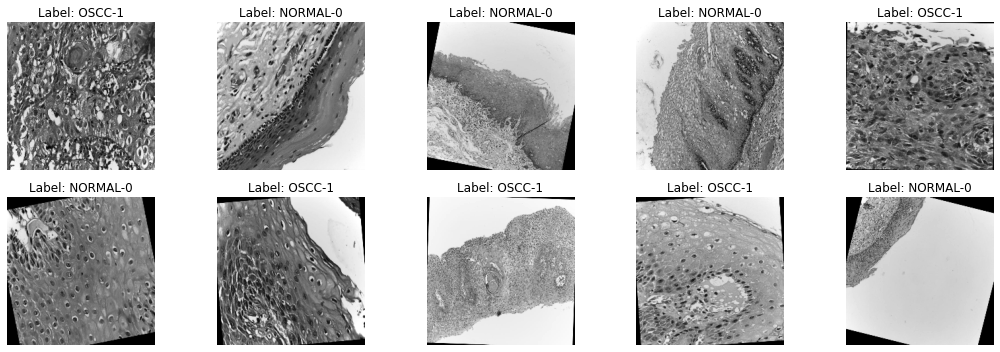

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL-0" or "OSCC-1"
    label_text = 'NORMAL-0' if label == 0 else 'OSCC-1'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


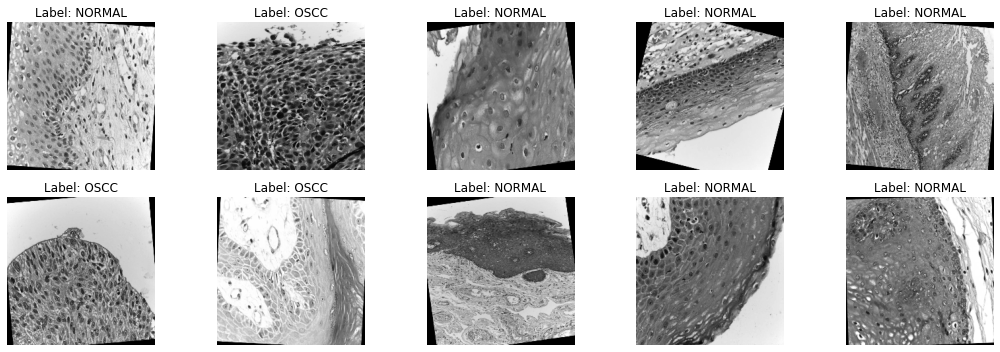

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL" or "OSCC"
    label_text = 'NORMAL' if label == 0 else 'OSCC'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


# VGG 16

# Dense layers

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4814 - auc_2: 0.4667 - auc_3: 0.4784 - false_negatives_1: 135.0323 - false_positives_1: 126.3226 - loss: 3.8770 - precision_1: 0.4843 - recall_1: 0.4830 - true_negatives_1: 130.0000 - true_positives_1: 119.6129 - val_accuracy: 0.6125 - val_auc_2: 0.7773 - val_auc_3: 0.7918 - val_false_negatives_1: 5.0000 - val_false_positives_1: 88.0000 - val_loss: 0.6768 - val_precision_1: 0.5622 - val_recall_1: 0.9576 - val_true_negatives_1: 34.0000 - val_true_positives_1: 113.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7521 - auc_2: 0.8566 - auc_3: 0.8696 - false_negatives_1: 58.7419 - false_positives_1: 64.1290 - loss: 0.4891 - precision_1: 0.7484 - recall_1: 0.7973 - true_negatives_1: 185.9355 - true_positives_1: 202.1613 - val_accuracy: 0.7625 - val_auc_2: 0.8472 - val_auc_3: 0.8542 - val_false_negatives_1: 45.0000 - val_false_positives_1: 12.0000 - val_loss: 0.5025 - val_precision_1: 0.8588 - val_recall_1: 0

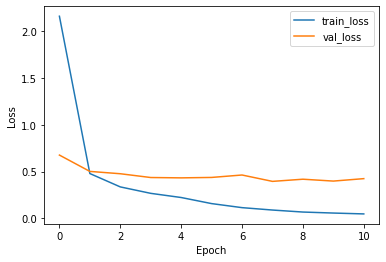

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8114 - auc_2: 0.9053 - auc_3: 0.8934 - false_negatives_1: 13.1111 - false_positives_1: 16.2222 - loss: 0.3845 - precision_1: 0.7702 - recall_1: 0.8144 - true_negatives_1: 66.2222 - true_positives_1: 57.3333
Test Accuracy: 82.08%
Precision: 0.81
Recall: 0.83
AUC-ROC: 0.90
AUC-PR: 0.90
TN: 99.0, FP: 23.0, FN: 20.0, TP: 98.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[99 23]
 [20 98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       122
           1       0.81      0.83      0.82       118

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

AUC Score: 0.82
Precision: 0.81
Recall: 0.83
F1 Score: 0.82
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.64
Matthews Correlation Coefficient (MCC): 0.64
Balanced Accuracy: 0.82
Time taken: 541.14 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5578 - auc_4: 0.5885 - auc_5: 0.5611 - false_negatives_2: 116.9677 - false_positives_2: 101.4839 - loss: 3.7514 - precision_2: 0.5389 - recall_2: 0.5009 - true_negatives_2: 154.9032 - true_positives_2: 137.6129 - val_accuracy: 0.6125 - val_auc_4: 0.7948 - val_auc_5: 0.7985 - val_false_negatives_2: 5.0000 - val_false_positives_2: 88.0000 - val_loss: 0.8307 - val_precision_2: 0.5622 - val_recall_2: 0.9576 - val_true_negatives_2: 34.0000 - val_true_positives_2: 113.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7394 - auc_4: 0.8419 - auc_5: 0.8590 - false_negatives_2: 57.4839 - false_positives_2: 63.8710 - loss: 0.5206 - precision_2: 0.7330 - recall_2: 0.7943 - true_negatives_2: 185.2258 - true_positives_2: 204.3871 - val_accuracy: 0.7542 - val_auc_4: 0.8532 - val_auc_5: 0.8571 - val_false_negatives_2: 50.0000 - val_false_positives_2: 9.0000 - val_loss: 0.5137 - val_precision_2: 0.8831 - val_recall_2: 

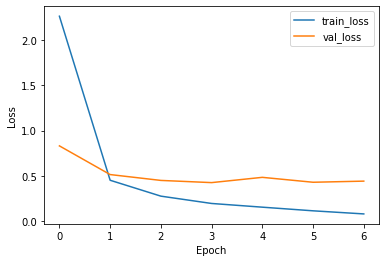

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8028 - auc_4: 0.8915 - auc_5: 0.8770 - false_negatives_2: 12.4444 - false_positives_2: 19.2222 - loss: 0.4172 - precision_2: 0.7476 - recall_2: 0.8370 - true_negatives_2: 63.2222 - true_positives_2: 58.0000
Test Accuracy: 80.00%
Precision: 0.78
Recall: 0.83
AUC-ROC: 0.89
AUC-PR: 0.88
TN: 94.0, FP: 28.0, FN: 20.0, TP: 98.0


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[94 28]
 [20 98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       122
           1       0.78      0.83      0.80       118

    accuracy                           0.80       240
   macro avg       0.80      0.80      0.80       240
weighted avg       0.80      0.80      0.80       240

AUC Score: 0.80
Precision: 0.78
Recall: 0.83
F1 Score: 0.80
PR AUC: 0.85
Cohen's Kappa Coefficient: 0.60
Matthews Correlation Coefficient (MCC): 0.60
Balanced Accuracy: 0.80
Time taken: 350.85 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5333 - auc_6: 0.5550 - auc_7: 0.5787 - false_negatives_3: 121.0000 - false_positives_3: 111.8710 - loss: 3.2883 - precision_3: 0.5483 - recall_3: 0.5269 - true_negatives_3: 135.1290 - true_positives_3: 142.9677 - val_accuracy: 0.6958 - val_auc_6: 0.7871 - val_auc_7: 0.7783 - val_false_negatives_3: 35.0000 - val_false_positives_3: 38.0000 - val_loss: 0.5543 - val_precision_3: 0.6860 - val_recall_3: 0.7034 - val_true_negatives_3: 84.0000 - val_true_positives_3: 83.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8027 - auc_6: 0.8843 - auc_7: 0.8954 - false_negatives_3: 58.3226 - false_positives_3: 42.8710 - loss: 0.4450 - precision_3: 0.8329 - recall_3: 0.7613 - true_negatives_3: 214.0968 - true_positives_3: 195.6774 - val_accuracy: 0.7958 - val_auc_6: 0.8609 - val_auc_7: 0.8698 - val_false_negatives_3: 27.0000 - val_false_positives_3: 22.0000 - val_loss: 0.4727 - val_precision_3: 0.8053 - val_recall_3:

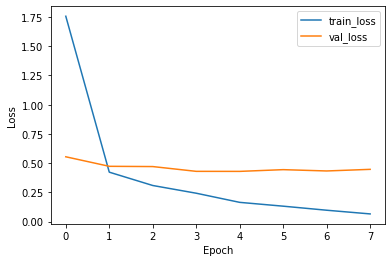

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8192 - auc_6: 0.8916 - auc_7: 0.8777 - false_negatives_3: 13.4444 - false_positives_3: 15.1111 - loss: 0.4083 - precision_3: 0.7841 - recall_3: 0.8150 - true_negatives_3: 67.3333 - true_positives_3: 57.0000
Test Accuracy: 81.67%
Precision: 0.81
Recall: 0.81
AUC-ROC: 0.88
AUC-PR: 0.88
TN: 100.0, FP: 22.0, FN: 22.0, TP: 96.0


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[100  22]
 [ 22  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       122
           1       0.81      0.81      0.81       118

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

AUC Score: 0.82
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 0.63
Balanced Accuracy: 0.82
Time taken: 396.83 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Dropout + Dense Layers

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,724,609 (105.76 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5302 - auc_8: 0.5329 - auc_9: 0.5128 - false_negatives_4: 118.5161 - false_positives_4: 122.0645 - loss: 1.4800 - precision_4: 0.5207 - recall_4: 0.5475 - true_negatives_4: 136.0645 - true_positives_4: 134.3226 - val_accuracy: 0.5083 - val_auc_8: 0.5540 - val_auc_9: 0.5517 - val_false_negatives_4: 118.0000 - val_false_positives_4: 0.0000e+00 - val_loss: 0.7811 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_true_negatives_4: 122.0000 - val_true_positives_4: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5981 - auc_8: 0.6152 - auc_9: 0.5821 - false_negatives_4: 106.2258 - false_positives_4: 99.4194 - loss: 0.8864 - precision_4: 0.6047 - recall_4: 0.5774 - true_negatives_4: 152.1935 - true_positives_4: 153.1290 - val_accuracy: 0.6583 - val_auc_8: 0.7587 - val_auc_9: 0.7491 - val_false_negatives_4: 70.0000 - val_false_positives_4: 12.0000 - val_loss: 0.6377 - val_precision_4: 0.8000 

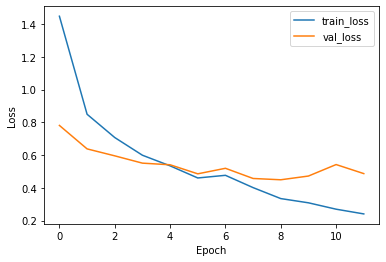

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7901 - auc_8: 0.8662 - auc_9: 0.8443 - false_negatives_4: 14.8889 - false_positives_4: 17.6667 - loss: 0.4645 - precision_4: 0.7506 - recall_4: 0.7842 - true_negatives_4: 64.7778 - true_positives_4: 55.5556
Test Accuracy: 79.58%
Precision: 0.79
Recall: 0.81
AUC-ROC: 0.87
AUC-PR: 0.87
TN: 96.0, FP: 26.0, FN: 23.0, TP: 95.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[96 26]
 [23 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       122
           1       0.79      0.81      0.79       118

    accuracy                           0.80       240
   macro avg       0.80      0.80      0.80       240
weighted avg       0.80      0.80      0.80       240

AUC Score: 0.80
Precision: 0.79
Recall: 0.81
F1 Score: 0.79
PR AUC: 0.84
Cohen's Kappa Coefficient: 0.59
Matthews Correlation Coefficient (MCC): 0.59
Balanced Accuracy: 0.80
Time taken: 586.37 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_dropout.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,724,609 (105.76 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4655 - auc_10: 0.4672 - auc_11: 0.4712 - false_negatives_5: 129.1290 - false_positives_5: 140.1935 - loss: 2.0563 - precision_5: 0.4598 - recall_5: 0.5009 - true_negatives_5: 116.4516 - true_positives_5: 125.1936 - val_accuracy: 0.5083 - val_auc_10: 0.6429 - val_auc_11: 0.5955 - val_false_negatives_5: 118.0000 - val_false_positives_5: 0.0000e+00 - val_loss: 0.8007 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - val_true_negatives_5: 122.0000 - val_true_positives_5: 0.0000e+00
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5438 - auc_10: 0.5871 - auc_11: 0.5779 - false_negatives_5: 103.6129 - false_positives_5: 125.5161 - loss: 0.9548 - precision_5: 0.5558 - recall_5: 0.5986 - true_negatives_5: 126.3226 - true_positives_5: 155.5161 - val_accuracy: 0.7167 - val_auc_10: 0.7818 - val_auc_11: 0.7813 - val_false_negatives_5: 41.0000 - val_false_positives_5: 27.0000 - val_loss: 0.6198 - val_precision

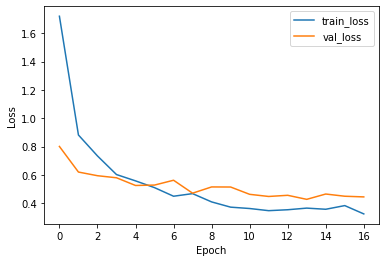

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8401 - auc_10: 0.9011 - auc_11: 0.8739 - false_negatives_5: 14.6667 - false_positives_5: 11.7778 - loss: 0.4154 - precision_5: 0.8377 - recall_5: 0.7951 - true_negatives_5: 70.6667 - true_positives_5: 55.7778
Test Accuracy: 82.50%
Precision: 0.83
Recall: 0.81
AUC-ROC: 0.89
AUC-PR: 0.88
TN: 103.0, FP: 19.0, FN: 23.0, TP: 95.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[103  19]
 [ 23  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       122
           1       0.83      0.81      0.82       118

    accuracy                           0.82       240
   macro avg       0.83      0.82      0.82       240
weighted avg       0.83      0.82      0.82       240

AUC Score: 0.82
Precision: 0.83
Recall: 0.81
F1 Score: 0.82
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.65
Matthews Correlation Coefficient (MCC): 0.65
Balanced Accuracy: 0.82
Time taken: 820.54 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_dropout.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,724,609 (105.76 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4779 - auc_12: 0.4660 - auc_13: 0.4694 - false_negatives_6: 130.5484 - false_positives_6: 135.3548 - loss: 1.6235 - precision_6: 0.4734 - recall_6: 0.4937 - true_negatives_6: 120.6129 - true_positives_6: 124.4516 - val_accuracy: 0.4917 - val_auc_12: 0.7195 - val_auc_13: 0.6800 - val_false_negatives_6: 0.0000e+00 - val_false_positives_6: 122.0000 - val_loss: 0.8535 - val_precision_6: 0.4917 - val_recall_6: 1.0000 - val_true_negatives_6: 0.0000e+00 - val_true_positives_6: 118.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5096 - auc_12: 0.5292 - auc_13: 0.4918 - false_negatives_6: 128.7419 - false_positives_6: 120.1936 - loss: 0.9461 - precision_6: 0.4982 - recall_6: 0.5039 - true_negatives_6: 139.5161 - true_positives_6: 122.5161 - val_accuracy: 0.6625 - val_auc_12: 0.7061 - val_auc_13: 0.7139 - val_false_negatives_6: 57.0000 - val_false_positives_6: 24.0000 - val_loss: 0.6567 - val_precision_6: 0.71

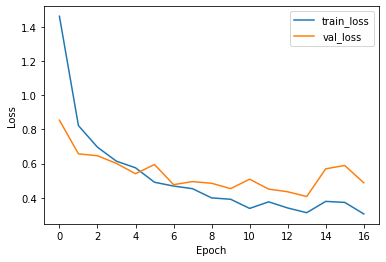

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8199 - auc_12: 0.9094 - auc_13: 0.8934 - false_negatives_6: 8.6667 - false_positives_6: 21.7778 - loss: 0.3958 - precision_6: 0.7493 - recall_6: 0.8973 - true_negatives_6: 60.6667 - true_positives_6: 61.7778
Test Accuracy: 79.58%
Precision: 0.75
Recall: 0.87
AUC-ROC: 0.90
AUC-PR: 0.89
TN: 88.0, FP: 34.0, FN: 15.0, TP: 103.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[ 88  34]
 [ 15 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       122
           1       0.75      0.87      0.81       118

    accuracy                           0.80       240
   macro avg       0.80      0.80      0.80       240
weighted avg       0.80      0.80      0.79       240

AUC Score: 0.80
Precision: 0.75
Recall: 0.87
F1 Score: 0.81
PR AUC: 0.84
Cohen's Kappa Coefficient: 0.59
Matthews Correlation Coefficient (MCC): 0.60
Balanced Accuracy: 0.80
Time taken: 820.42 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_dropout.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Dropout + Dense Layers + Maxpooling

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,724,609 (105.76 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5345 - auc_14: 0.5582 - auc_15: 0.5775 - false_negatives_7: 110.4516 - false_positives_7: 127.6774 - loss: 1.0897 - precision_7: 0.5457 - recall_7: 0.6068 - true_negatives_7: 120.3871 - true_positives_7: 152.4516 - val_accuracy: 0.5083 - val_auc_14: 0.7015 - val_auc_15: 0.6924 - val_false_negatives_7: 118.0000 - val_false_positives_7: 0.0000e+00 - val_loss: 1.1143 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_true_negatives_7: 122.0000 - val_true_positives_7: 0.0000e+00
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6010 - auc_14: 0.6490 - auc_15: 0.6378 - false_negatives_7: 107.5161 - false_positives_7: 91.5806 - loss: 0.7427 - precision_7: 0.6452 - recall_7: 0.5404 - true_negatives_7: 164.1613 - true_positives_7: 147.7097 - val_accuracy: 0.7042 - val_auc_14: 0.7952 - val_auc_15: 0.7899 - val_false_negatives_7: 22.0000 - val_false_positives_7: 49.0000 - val_loss: 0.5679 - val_precision_7:

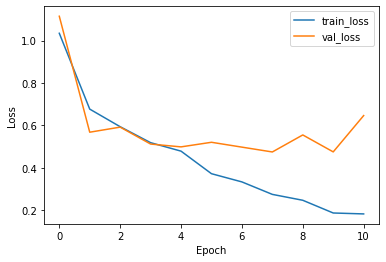

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8069 - auc_14: 0.8716 - auc_15: 0.8593 - false_negatives_7: 25.1111 - false_positives_7: 6.3333 - loss: 0.4515 - precision_7: 0.8910 - recall_7: 0.6432 - true_negatives_7: 76.1111 - true_positives_7: 45.3333
Test Accuracy: 79.58%
Precision: 0.89
Recall: 0.67
AUC-ROC: 0.88
AUC-PR: 0.88
TN: 112.0, FP: 10.0, FN: 39.0, TP: 79.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[112  10]
 [ 39  79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       122
           1       0.89      0.67      0.76       118

    accuracy                           0.80       240
   macro avg       0.81      0.79      0.79       240
weighted avg       0.81      0.80      0.79       240

AUC Score: 0.79
Precision: 0.89
Recall: 0.67
F1 Score: 0.76
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.59
Matthews Correlation Coefficient (MCC): 0.61
Balanced Accuracy: 0.79
Time taken: 538.55 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_dropout_dense.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,724,609 (105.76 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5075 - auc_16: 0.5216 - auc_17: 0.5225 - false_negatives_8: 129.6452 - false_positives_8: 114.1936 - loss: 1.2608 - precision_8: 0.5217 - recall_8: 0.4685 - true_negatives_8: 138.6129 - true_positives_8: 128.5161 - val_accuracy: 0.6167 - val_auc_16: 0.6591 - val_auc_17: 0.6570 - val_false_negatives_8: 54.0000 - val_false_positives_8: 38.0000 - val_loss: 0.6562 - val_precision_8: 0.6275 - val_recall_8: 0.5424 - val_true_negatives_8: 84.0000 - val_true_positives_8: 64.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5729 - auc_16: 0.6056 - auc_17: 0.6031 - false_negatives_8: 105.1936 - false_positives_8: 110.4194 - loss: 0.7677 - precision_8: 0.5601 - recall_8: 0.5842 - true_negatives_8: 147.0645 - true_positives_8: 148.2903 - val_accuracy: 0.6208 - val_auc_16: 0.7784 - val_auc_17: 0.7739 - val_false_negatives_8: 10.0000 - val_false_positives_8: 81.0000 - val_loss: 0.6250 - val_precision_8: 0.5714 - val

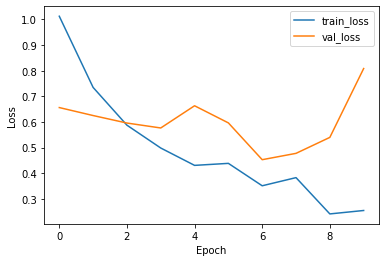

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7987 - auc_16: 0.8662 - auc_17: 0.8520 - false_negatives_8: 18.7778 - false_positives_8: 13.7778 - loss: 0.4434 - precision_8: 0.7895 - recall_8: 0.7421 - true_negatives_8: 68.6667 - true_positives_8: 51.6667
Test Accuracy: 79.17%
Precision: 0.81
Recall: 0.75
AUC-ROC: 0.87
AUC-PR: 0.87
TN: 101.0, FP: 21.0, FN: 29.0, TP: 89.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[101  21]
 [ 29  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       122
           1       0.81      0.75      0.78       118

    accuracy                           0.79       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.79      0.79      0.79       240

AUC Score: 0.79
Precision: 0.81
Recall: 0.75
F1 Score: 0.78
PR AUC: 0.84
Cohen's Kappa Coefficient: 0.58
Matthews Correlation Coefficient (MCC): 0.58
Balanced Accuracy: 0.79
Time taken: 491.68 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_dropout_dense.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,724,609 (105.76 MB)

 Trainable params: 13,009,921 (49.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5411 - auc_18: 0.5589 - auc_19: 0.5712 - false_negatives_9: 114.2581 - false_positives_9: 123.1936 - loss: 1.1803 - precision_9: 0.5419 - recall_9: 0.5821 - true_negatives_9: 130.2903 - true_positives_9: 143.2258 - val_accuracy: 0.5167 - val_auc_18: 0.7304 - val_auc_19: 0.7307 - val_false_negatives_9: 1.0000 - val_false_positives_9: 115.0000 - val_loss: 0.7026 - val_precision_9: 0.5043 - val_recall_9: 0.9915 - val_true_negatives_9: 7.0000 - val_true_positives_9: 117.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6121 - auc_18: 0.6350 - auc_19: 0.6446 - false_negatives_9: 94.8387 - false_positives_9: 100.9677 - loss: 0.7312 - precision_9: 0.6101 - recall_9: 0.6487 - true_negatives_9: 151.8387 - true_positives_9: 163.3226 - val_accuracy: 0.7375 - val_auc_18: 0.7972 - val_auc_19: 0.7973 - val_false_negatives_9: 34.0000 - val_false_positives_9: 29.0000 - val_loss: 0.5458 - val_precision_9: 0.7434 - val_

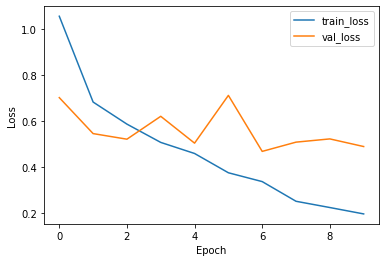

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7986 - auc_18: 0.8739 - auc_19: 0.8529 - false_negatives_9: 19.3333 - false_positives_9: 12.7778 - loss: 0.4490 - precision_9: 0.7967 - recall_9: 0.7313 - true_negatives_9: 69.6667 - true_positives_9: 51.1111
Test Accuracy: 79.17%
Precision: 0.82
Recall: 0.74
AUC-ROC: 0.87
AUC-PR: 0.87
TN: 103.0, FP: 19.0, FN: 31.0, TP: 87.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[103  19]
 [ 31  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       122
           1       0.82      0.74      0.78       118

    accuracy                           0.79       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.79      0.79      0.79       240

AUC Score: 0.79
Precision: 0.82
Recall: 0.74
F1 Score: 0.78
PR AUC: 0.84
Cohen's Kappa Coefficient: 0.58
Matthews Correlation Coefficient (MCC): 0.59
Balanced Accuracy: 0.79
Time taken: 490.04 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base
model = Sequential([
    vgg_base,
    Flatten(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_dropout_dense.h5')

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# GlobalAveragePooling2D

In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


2024-11-16 12:57:46.708453: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 12:57:46.709213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 12:57:46.711777: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 12:57:46.718333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731742066.729188    8793 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731742066.73

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,141,697 (57.76 MB)

 Trainable params: 427,009 (1.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.4874 - auc: 0.4942 - auc_1: 0.4899 - false_negatives: 117.5161 - false_positives: 137.0000 - loss: 0.7350 - precision: 0.4612 - recall: 0.4913 - true_negatives: 119.8710 - true_positives: 136.5806 - val_accuracy: 0.6750 - val_auc: 0.7481 - val_auc_1: 0.7424 - val_false_negatives: 32.0000 - val_false_positives: 46.0000 - val_loss: 0.6628 - val_precision: 0.6515 - val_recall: 0.7288 - val_true_negatives: 76.0000 - val_true_positives: 86.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.6256 - auc: 0.6659 - auc_1: 0.6587 - false_negatives: 107.3226 - false_positives: 85.2581 - loss: 0.6546 - precision: 0.6399 - recall: 0.5649 - true_negatives: 171.6774 - true_positives: 146.7097 - val_accuracy: 0.6875 - val_auc: 0.7565 - val_auc_1: 0.7529 - val_false_negatives: 34.0000 - val_false_positives: 41.0000 - val_loss: 0.5974 - val_precision: 0.6720 - val_recall: 0.7119 - val_true_negatives: 81.0000 - val_true_posi

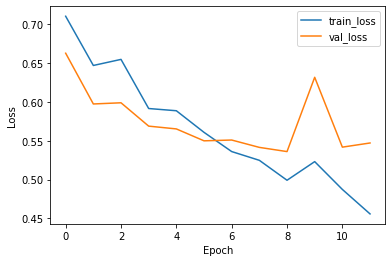

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7548 - auc: 0.8221 - auc_1: 0.7741 - false_negatives: 26.5556 - false_positives: 11.1111 - loss: 0.5249 - precision: 0.7791 - recall: 0.6207 - true_negatives: 71.3333 - true_positives: 43.8889
Test Accuracy: 75.00%
Precision: 0.82
Recall: 0.64
AUC-ROC: 0.82
AUC-PR: 0.79
TN: 105.0, FP: 17.0, FN: 43.0, TP: 75.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


Confusion Matrix:
[[105  17]
 [ 43  75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       122
           1       0.82      0.64      0.71       118

    accuracy                           0.75       240
   macro avg       0.76      0.75      0.75       240
weighted avg       0.76      0.75      0.75       240

AUC Score: 0.75
Precision: 0.82
Recall: 0.64
F1 Score: 0.71
PR AUC: 0.81
Cohen's Kappa Coefficient: 0.50
Matthews Correlation Coefficient (MCC): 0.51
Balanced Accuracy: 0.75
Time taken: 955.49 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with GlobalAveragePooling2D
model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history (loss)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_gavgpool_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg16_model_metrics.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,141,697 (57.76 MB)

 Trainable params: 427,009 (1.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.5020 - auc_2: 0.5043 - auc_3: 0.5174 - false_negatives_1: 129.1935 - false_positives_1: 118.9032 - loss: 0.7274 - precision_1: 0.5011 - recall_1: 0.4780 - true_negatives_1: 137.6452 - true_positives_1: 125.2258 - val_accuracy: 0.4917 - val_auc_2: 0.7541 - val_auc_3: 0.7534 - val_false_negatives_1: 0.0000e+00 - val_false_positives_1: 122.0000 - val_loss: 0.7109 - val_precision_1: 0.4917 - val_recall_1: 1.0000 - val_true_negatives_1: 0.0000e+00 - val_true_positives_1: 118.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.5937 - auc_2: 0.6068 - auc_3: 0.5851 - false_negatives_1: 103.7097 - false_positives_1: 102.1290 - loss: 0.6854 - precision_1: 0.5866 - recall_1: 0.6268 - true_negatives_1: 154.3548 - true_positives_1: 150.7742 - val_accuracy: 0.6458 - val_auc_2: 0.7542 - val_auc_3: 0.7449 - val_false_negatives_1: 20.0000 - val_false_positives_1: 65.0000 - val_loss: 0.6203 - val_precision_1: 0.6012 - va

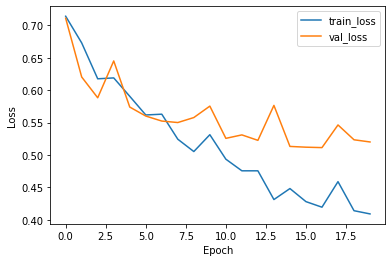

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7472 - auc_2: 0.8506 - auc_3: 0.7974 - false_negatives_1: 19.0000 - false_positives_1: 19.0000 - loss: 0.5005 - precision_1: 0.7110 - recall_1: 0.7133 - true_negatives_1: 63.4444 - true_positives_1: 51.4444
Test Accuracy: 75.83%
Precision: 0.75
Recall: 0.75
AUC-ROC: 0.84
AUC-PR: 0.82
TN: 93.0, FP: 29.0, FN: 29.0, TP: 89.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


Confusion Matrix:
[[93 29]
 [29 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       122
           1       0.75      0.75      0.75       118

    accuracy                           0.76       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.76      0.76      0.76       240

AUC Score: 0.76
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
PR AUC: 0.81
Cohen's Kappa Coefficient: 0.52
Matthews Correlation Coefficient (MCC): 0.52
Balanced Accuracy: 0.76
Time taken: 1527.72 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with GlobalAveragePooling2D
model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history (loss)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_gavgpool_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg16_model_metrics.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,141,697 (57.76 MB)

 Trainable params: 427,009 (1.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.5296 - auc_4: 0.5177 - auc_5: 0.5251 - false_negatives_2: 120.6129 - false_positives_2: 118.7419 - loss: 0.7200 - precision_2: 0.5196 - recall_2: 0.4990 - true_negatives_2: 138.1613 - true_positives_2: 133.4516 - val_accuracy: 0.5667 - val_auc_4: 0.7339 - val_auc_5: 0.7283 - val_false_negatives_2: 102.0000 - val_false_positives_2: 2.0000 - val_loss: 0.6683 - val_precision_2: 0.8889 - val_recall_2: 0.1356 - val_true_negatives_2: 120.0000 - val_true_positives_2: 16.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.5832 - auc_4: 0.6004 - auc_5: 0.6006 - false_negatives_2: 108.7097 - false_positives_2: 99.6774 - loss: 0.6776 - precision_2: 0.5956 - recall_2: 0.5281 - true_negatives_2: 149.5484 - true_positives_2: 153.0323 - val_accuracy: 0.6958 - val_auc_4: 0.7571 - val_auc_5: 0.7630 - val_false_negatives_2: 56.0000 - val_false_positives_2: 17.0000 - val_loss: 0.6291 - val_precision_2: 0.7848 - val_recall_

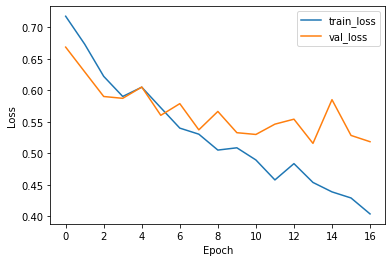

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7590 - auc_4: 0.8394 - auc_5: 0.7845 - false_negatives_2: 21.2222 - false_positives_2: 15.0000 - loss: 0.5068 - precision_2: 0.7438 - recall_2: 0.6922 - true_negatives_2: 67.4444 - true_positives_2: 49.2222
Test Accuracy: 76.25%
Precision: 0.79
Recall: 0.71
AUC-ROC: 0.83
AUC-PR: 0.80
TN: 99.0, FP: 23.0, FN: 34.0, TP: 84.0


8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


Confusion Matrix:
[[99 23]
 [34 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       122
           1       0.79      0.71      0.75       118

    accuracy                           0.76       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.76      0.76      0.76       240

AUC Score: 0.76
Precision: 0.79
Recall: 0.71
F1 Score: 0.75
PR AUC: 0.82
Cohen's Kappa Coefficient: 0.52
Matthews Correlation Coefficient (MCC): 0.53
Balanced Accuracy: 0.76
Time taken: 1490.79 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with GlobalAveragePooling2D
model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history (loss)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_gavgpool_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg16_model_metrics.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Conv2D + GlobalAveragePooling2D +Dropout+ Dense Layers

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,157,761 (61.64 MB)

 Trainable params: 1,443,073 (5.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.5732 - auc_6: 0.5608 - auc_7: 0.5295 - false_negatives_3: 113.0968 - false_positives_3: 105.9677 - loss: 0.7525 - precision_3: 0.5614 - recall_3: 0.5401 - true_negatives_3: 156.7419 - true_positives_3: 135.1613 - val_accuracy: 0.4917 - val_auc_6: 0.7140 - val_auc_7: 0.6904 - val_false_negatives_3: 0.0000e+00 - val_false_positives_3: 122.0000 - val_loss: 0.7170 - val_precision_3: 0.4917 - val_recall_3: 1.0000 - val_true_negatives_3: 0.0000e+00 - val_true_positives_3: 118.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.6114 - auc_6: 0.6454 - auc_7: 0.6519 - false_negatives_3: 98.5806 - false_positives_3: 96.3871 - loss: 0.6556 - precision_3: 0.6190 - recall_3: 0.6410 - true_negatives_3: 156.7742 - true_positives_3: 159.2258 - val_accuracy: 0.5708 - val_auc_6: 0.7630 - val_auc_7: 0.7657 - val_false_negatives_3: 5.0000 - val_false_positives_3: 98.0000 - val_loss: 0.6828 - val_precision_3: 0.5355 - val_reca

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


Confusion Matrix:
[[90 32]
 [30 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       122
           1       0.73      0.75      0.74       118

    accuracy                           0.74       240
   macro avg       0.74      0.74      0.74       240
weighted avg       0.74      0.74      0.74       240

AUC Score: 0.74
Precision: 0.73
Recall: 0.75
F1 Score: 0.74
PR AUC: 0.80
Cohen's Kappa Coefficient: 0.48
Matthews Correlation Coefficient (MCC): 0.48
Balanced Accuracy: 0.74


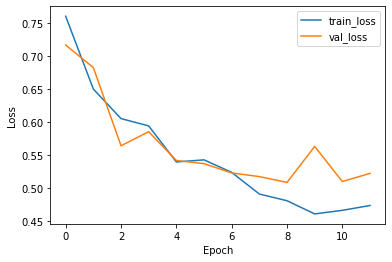

Time taken: 1039.17 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with Conv2D, GlobalAveragePooling2D, Dropout, and Dense layers
model = Sequential([
    vgg_base,
    Conv2D(256, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_conv_gap_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg16_model_metrics_with_conv_gap_dropout_dense.csv', index=False)

# Plot training history (loss)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 5, 5, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,157,761 (61.64 MB)

 Trainable params: 1,443,073 (5.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.4742 - auc_8: 0.4834 - auc_9: 0.4980 - false_negatives_4: 133.7097 - false_positives_4: 134.6452 - loss: 0.7963 - precision_4: 0.4848 - recall_4: 0.4732 - true_negatives_4: 120.5161 - true_positives_4: 122.0968 - val_accuracy: 0.5125 - val_auc_8: 0.6974 - val_auc_9: 0.6887 - val_false_negatives_4: 0.0000e+00 - val_false_positives_4: 117.0000 - val_loss: 0.6885 - val_precision_4: 0.5021 - val_recall_4: 1.0000 - val_true_negatives_4: 5.0000 - val_true_positives_4: 118.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.5442 - auc_8: 0.5739 - auc_9: 0.5771 - false_negatives_4: 98.5484 - false_positives_4: 132.0645 - loss: 0.7017 - precision_4: 0.5379 - recall_4: 0.6487 - true_negatives_4: 121.7097 - true_positives_4: 158.6452 - val_accuracy: 0.6958 - val_auc_8: 0.7563 - val_auc_9: 0.7628 - val_false_negatives_4: 37.0000 - val_false_positives_4: 36.0000 - val_loss: 0.6232 - val_precision_4: 0.6923 - val_rec

Confusion Matrix:
[[98 24]
 [30 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       122
           1       0.79      0.75      0.77       118

    accuracy                           0.78       240
   macro avg       0.78      0.77      0.77       240
weighted avg       0.78      0.78      0.77       240

AUC Score: 0.77
Precision: 0.79
Recall: 0.75
F1 Score: 0.77
PR AUC: 0.83
Cohen's Kappa Coefficient: 0.55
Matthews Correlation Coefficient (MCC): 0.55
Balanced Accuracy: 0.77


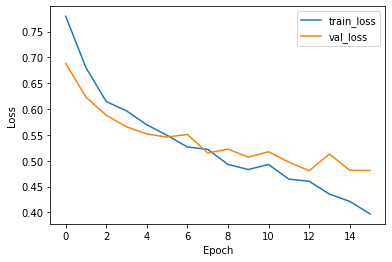

Time taken: 953.28 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with Conv2D, GlobalAveragePooling2D, Dropout, and Dense layers
model = Sequential([
    vgg_base,
    Conv2D(256, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_conv_gap_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg16_model_metrics_with_conv_gap_dropout_dense.csv', index=False)

# Plot training history (loss)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,157,761 (61.64 MB)

 Trainable params: 1,443,073 (5.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5031 - auc_10: 0.5253 - auc_11: 0.4848 - false_negatives_5: 132.4194 - false_positives_5: 118.9355 - loss: 0.7560 - precision_5: 0.4648 - recall_5: 0.4381 - true_negatives_5: 147.6774 - true_positives_5: 111.9355 - val_accuracy: 0.5083 - val_auc_10: 0.7435 - val_auc_11: 0.7424 - val_false_negatives_5: 0.0000e+00 - val_false_positives_5: 118.0000 - val_loss: 0.7316 - val_precision_5: 0.5000 - val_recall_5: 1.0000 - val_true_negatives_5: 4.0000 - val_true_positives_5: 118.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5412 - auc_10: 0.5989 - auc_11: 0.6087 - false_negatives_5: 114.0000 - false_positives_5: 113.4516 - loss: 0.7086 - precision_5: 0.5416 - recall_5: 0.5712 - true_negatives_5: 143.0000 - true_positives_5: 140.5161 - val_accuracy: 0.5750 - val_auc_10: 0.7551 - val_auc_11: 0.7435 - val_false_negatives_5: 99.0000 - val_false_positives_5: 3.0000 - val_loss: 0.6508 - val_precision_5: 0.8636 - 

Confusion Matrix:
[[96 26]
 [30 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       122
           1       0.77      0.75      0.76       118

    accuracy                           0.77       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.77      0.77      0.77       240

AUC Score: 0.77
Precision: 0.77
Recall: 0.75
F1 Score: 0.76
PR AUC: 0.82
Cohen's Kappa Coefficient: 0.53
Matthews Correlation Coefficient (MCC): 0.53
Balanced Accuracy: 0.77


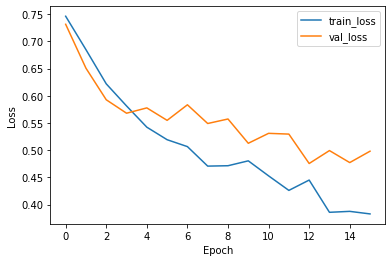

Time taken: 759.60 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with Conv2D, GlobalAveragePooling2D, Dropout, and Dense layers
model = Sequential([
    vgg_base,
    Conv2D(256, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(512, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% rate
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% rate
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Save the model
model.save('vgg16_model_with_conv_gap_dropout_dense.h5')

# Save the evaluation metrics to a CSV file
metrics_dict = {
    'Test Accuracy': [test_accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'AUC-ROC': [auc_roc],
    'AUC-PR': [auc_pr],
    'TN': [tn],
    'FP': [fp],
    'FN': [fn],
    'TP': [tp],
    'F1 Score': [f1],
    'PR AUC': [pr_auc],
    "Cohen's Kappa": [kappa],
    'Matthews Correlation Coef.': [mcc],
    'Balanced Accuracy': [balanced_accuracy]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv('vgg16_model_metrics_with_conv_gap_dropout_dense.csv', index=False)

# Plot training history (loss)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# LSTM + Dense Layers

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 3584)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     1,901,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,624,065 (63.42 MB)

 Trainable params: 1,909,377 (7.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5482 - loss: 0.6781 - val_accuracy: 0.7083 - val_loss: 0.5827
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7266 - loss: 0.5557 - val_accuracy: 0.7000 - val_loss: 0.5650
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7946 - loss: 0.4635 - val_accuracy: 0.7333 - val_loss: 0.5144
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8600 - loss: 0.3555 - val_accuracy: 0.6917 - val_loss: 0.6312
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8402 - loss: 0.3396 - val_accuracy: 0.8042 - val_loss: 0.4849
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9470 - loss: 0.1672 - val_accuracy: 0.7667 - val_loss: 0.5557
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9459 - loss: 0.1339 - val_accuracy: 0.7708 - val_loss: 0.5587
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9575 - loss: 0.1039 - val_accuracy: 0.7500 - val_loss:

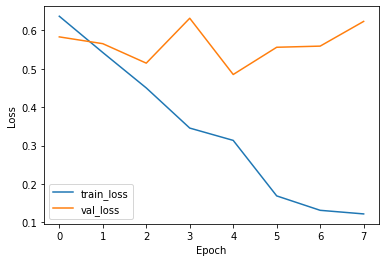

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7998 - loss: 0.4732
Test Accuracy: 80.42%
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Confusion Matrix:
[[ 87  35]
 [ 12 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       122
           1       0.75      0.90      0.82       118

    accuracy                           0.80       240
   macro avg       0.82      0.81      0.80       240
weighted avg       0.82      0.80      0.80       240

AUC Score: 0.81

Precision: 0.75177304964539
Recall: 0.8983050847457628
F1 Score: 0.8185328185328186
Cohen's Kappa Coefficient: 0.61
Matthews Correlation Coefficient (MCC): 0.62
Balanced Accuracy: 0.81
Time taken: 386.58 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with LSTM and Dense layers
model = Sequential([
    vgg_base,
    Flatten(),
    Reshape((7, 7*512)),  # Reshape to match LSTM input shape
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Save the model predictions to CSV
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})
predictions_df.to_csv('vgg16_lstm_predictions.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 3584)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │     1,901,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,624,065 (63.42 MB)

 Trainable params: 1,909,377 (7.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5077 - loss: 0.7232 - val_accuracy: 0.6792 - val_loss: 0.6670
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6780 - loss: 0.6351 - val_accuracy: 0.6667 - val_loss: 0.6079
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7333 - loss: 0.5512 - val_accuracy: 0.7250 - val_loss: 0.5622
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8068 - loss: 0.4573 - val_accuracy: 0.7333 - val_loss: 0.5432
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8230 - loss: 0.4086 - val_accuracy: 0.7583 - val_loss: 0.5225
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8856 - loss: 0.3180 - val_accuracy: 0.7417 - val_loss: 0.5557
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9020 - loss: 0.2624 - val_accuracy: 0.7458 - val_loss: 0.5873
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8998 - loss: 0.2259 - val_accuracy: 0.7458 - v

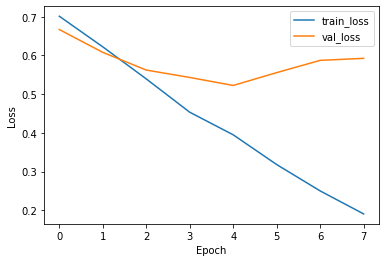

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7881 - loss: 0.4874
Test Accuracy: 75.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Confusion Matrix:
[[102  20]
 [ 38  80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       122
           1       0.80      0.68      0.73       118

    accuracy                           0.76       240
   macro avg       0.76      0.76      0.76       240
weighted avg       0.76      0.76      0.76       240

AUC Score: 0.76

Precision: 0.8
Recall: 0.6779661016949152
F1 Score: 0.7339449541284404
Cohen's Kappa Coefficient: 0.52
Matthews Correlation Coefficient (MCC): 0.52
Balanced Accuracy: 0.76
Time taken: 385.78 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with LSTM and Dense layers
model = Sequential([
    vgg_base,
    Flatten(),
    Reshape((7, 7*512)),  # Reshape to match LSTM input shape
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Save the model predictions to CSV
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})
predictions_df.to_csv('vgg16_lstm_predictions.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 3584)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │     1,901,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,624,065 (63.42 MB)

 Trainable params: 1,909,377 (7.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4988 - loss: 0.7579 - val_accuracy: 0.6458 - val_loss: 0.6625
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6471 - loss: 0.6464 - val_accuracy: 0.6792 - val_loss: 0.6039
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7115 - loss: 0.5504 - val_accuracy: 0.6875 - val_loss: 0.5593
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7619 - loss: 0.4936 - val_accuracy: 0.7292 - val_loss: 0.5251
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8568 - loss: 0.3715 - val_accuracy: 0.7583 - val_loss: 0.4977
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8711 - loss: 0.3299 - val_accuracy: 0.7625 - val_loss: 0.5104
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9210 - loss: 0.2295 - val_accuracy: 0.8083 - val_loss: 0.4693
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9417 - loss: 0.1799 - val_accuracy: 0.7667 - v

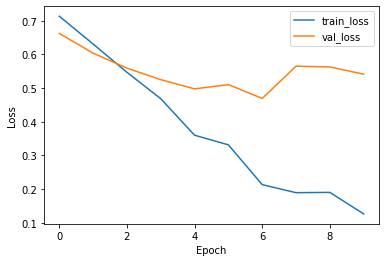

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8467 - loss: 0.4136
Test Accuracy: 80.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Confusion Matrix:
[[95 27]
 [19 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       122
           1       0.79      0.84      0.81       118

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240

AUC Score: 0.81

Precision: 0.7857142857142857
Recall: 0.8389830508474576
F1 Score: 0.8114754098360656
Cohen's Kappa Coefficient: 0.62
Matthews Correlation Coefficient (MCC): 0.62
Balanced Accuracy: 0.81
Time taken: 476.91 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import pandas as pd
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create new model on top of the VGG16 base with LSTM and Dense layers
model = Sequential([
    vgg_base,
    Flatten(),
    Reshape((7, 7*512)),  # Reshape to match LSTM input shape
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Save the model predictions to CSV
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})
predictions_df.to_csv('vgg16_lstm_predictions.csv', index=False)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# GRU + Dense Layers

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,334,273 (295.01 MB)

 Trainable params: 77,334,273 (295.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.4963 - auc_32: 0.4902 - auc_33: 0.5029 - false_negatives_16: 90.3226 - false_positives_16: 162.9677 - loss: 0.8137 - precision_16: 0.4895 - recall_16: 0.5547 - true_negatives_16: 94.8710 - true_positives_16: 162.8065 - val_accuracy: 0.4917 - val_auc_32: 0.5000 - val_auc_33: 0.4917 - val_false_negatives_16: 0.0000e+00 - val_false_positives_16: 122.0000 - val_loss: 0.7082 - val_precision_16: 0.4917 - val_recall_16: 1.0000 - val_true_negatives_16: 0.0000e+00 - val_true_positives_16: 118.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 384ms/step - accuracy: 0.4910 - auc_32: 0.5262 - auc_33: 0.5211 - false_negatives_16: 62.3871 - false_positives_16: 199.9677 - loss: 0.7001 - precision_16: 0.4902 - recall_16: 0.8470 - true_negatives_16: 60.4516 - true_positives_16: 188.1613 - val_accuracy: 0.5083 - val_auc_32: 0.5000 - val_auc_33: 0.4917 - val_false_negatives_16: 118.0000 - val_false_positives_16: 0.0000e+00 - val_loss: 0.6933

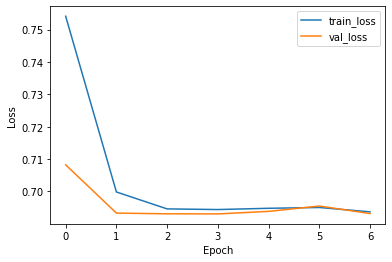

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5577 - auc_32: 0.5000 - auc_33: 0.4423 - false_negatives_16: 70.4444 - false_positives_16: 0.0000e+00 - loss: 0.6926 - precision_16: 0.0000e+00 - recall_16: 0.0000e+00 - true_negatives_16: 82.4444 - true_positives_16: 0.0000e+00
Test Accuracy: 50.83%
Precision: 0.00
Recall: 0.00
AUC-ROC: 0.50
AUC-PR: 0.49
TP: 0.0, FP: 0.0, TN: 122.0, FN: 118.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Time taken: 83.33 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Create the model
model = Sequential([
    Reshape((224*224*3,), input_shape=(224, 224, 3)),  # Flatten the image data
    Dense(512, activation='relu'),  # Dense layer with 512 units and ReLU activation
    Dense(256, activation='relu'),  # Dense layer with 256 units and ReLU activation
    Dense(128, activation='relu'),  # Dense layer with 128 units and ReLU activation
    Reshape((1, -1)),  # Reshape for GRU layer
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_5 (Reshape)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,334,273 (295.01 MB)

 Trainable params: 77,334,273 (295.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.5146 - auc_34: 0.4399 - auc_35: 0.4693 - false_negatives_17: 22.1935 - false_positives_17: 228.6774 - loss: 0.9602 - precision_17: 0.5142 - recall_17: 0.9505 - true_negatives_17: 23.2258 - true_positives_17: 236.8710 - val_accuracy: 0.5083 - val_auc_34: 0.5000 - val_auc_35: 0.4917 - val_false_negatives_17: 118.0000 - val_false_positives_17: 0.0000e+00 - val_loss: 0.6938 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00 - val_true_negatives_17: 122.0000 - val_true_positives_17: 0.0000e+00
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - accuracy: 0.4961 - auc_34: 0.4488 - auc_35: 0.4659 - false_negatives_17: 241.6452 - false_positives_17: 14.8387 - loss: 0.6956 - precision_17: 0.1038 - recall_17: 0.0283 - true_negatives_17: 241.4516 - true_positives_17: 13.0323 - val_accuracy: 0.4917 - val_auc_34: 0.5000 - val_auc_35: 0.4917 - val_false_negatives_17: 0.0000e+00 - val_false_positives_17: 122.0000 - val_lo

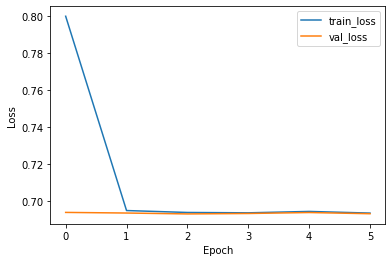

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5577 - auc_34: 0.5000 - auc_35: 0.4423 - false_negatives_17: 70.4444 - false_positives_17: 0.0000e+00 - loss: 0.6920 - precision_17: 0.0000e+00 - recall_17: 0.0000e+00 - true_negatives_17: 82.4444 - true_positives_17: 0.0000e+00
Test Accuracy: 50.83%
Precision: 0.00
Recall: 0.00
AUC-ROC: 0.50
AUC-PR: 0.49
TP: 0.0, FP: 0.0, TN: 122.0, FN: 118.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Time taken: 71.42 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Create the model
model = Sequential([
    Reshape((224*224*3,), input_shape=(224, 224, 3)),  # Flatten the image data
    Dense(512, activation='relu'),  # Dense layer with 512 units and ReLU activation
    Dense(256, activation='relu'),  # Dense layer with 256 units and ReLU activation
    Dense(128, activation='relu'),  # Dense layer with 128 units and ReLU activation
    Reshape((1, -1)),  # Reshape for GRU layer
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_7 (Reshape)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,334,273 (295.01 MB)

 Trainable params: 77,334,273 (295.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - accuracy: 0.4880 - auc_36: 0.4836 - auc_37: 0.4789 - false_negatives_18: 86.7742 - false_positives_18: 171.9032 - loss: 0.8160 - precision_18: 0.4643 - recall_18: 0.5431 - true_negatives_18: 82.0323 - true_positives_18: 170.2581 - val_accuracy: 0.5083 - val_auc_36: 0.5000 - val_auc_37: 0.4917 - val_false_negatives_18: 118.0000 - val_false_positives_18: 0.0000e+00 - val_loss: 0.6930 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_true_negatives_18: 122.0000 - val_true_positives_18: 0.0000e+00
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - accuracy: 0.4765 - auc_36: 0.4808 - auc_37: 0.4943 - false_negatives_18: 201.7419 - false_positives_18: 63.6129 - loss: 0.6943 - precision_18: 0.4385 - recall_18: 0.2538 - true_negatives_18: 190.7419 - true_positives_18: 54.8710 - val_accuracy: 0.4917 - val_auc_36: 0.5000 - val_auc_37: 0.4917 - val_false_negatives_18: 0.0000e+00 - val_false_positives_18: 122.0000 - val_lo

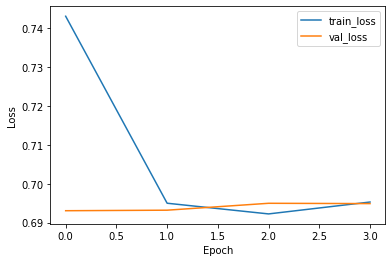

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5577 - auc_36: 0.5000 - auc_37: 0.4423 - false_negatives_18: 70.4444 - false_positives_18: 0.0000e+00 - loss: 0.6921 - precision_18: 0.0000e+00 - recall_18: 0.0000e+00 - true_negatives_18: 82.4444 - true_positives_18: 0.0000e+00
Test Accuracy: 50.83%
Precision: 0.00
Recall: 0.00
AUC-ROC: 0.50
AUC-PR: 0.49
TP: 0.0, FP: 0.0, TN: 122.0, FN: 118.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
[[122   0]
 [118   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       122
           1       0.00      0.00      0.00       118

    accuracy                           0.51       240
   macro avg       0.25      0.50      0.34       240
weighted avg       0.26      0.51      0.34       240

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Time taken: 49.14 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Create the model
model = Sequential([
    Reshape((224*224*3,), input_shape=(224, 224, 3)),  # Flatten the image data
    Dense(512, activation='relu'),  # Dense layer with 512 units and ReLU activation
    Dense(256, activation='relu'),  # Dense layer with 256 units and ReLU activation
    Dense(128, activation='relu'),  # Dense layer with 128 units and ReLU activation
    Reshape((1, -1)),  # Reshape for GRU layer
    GRU(128),  # GRU layer with 128 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")
